In [ ]:
import pandas as pd
import numpy as np
import re
import string
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import LinearSVC
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
np.random.seed(500)

Corpus = pd.read_csv(
    r"dataset_2.csv", encoding='latin-1')

In [ ]:
df = pd.read_csv('dataset_2.csv')

df.head()

,text,label
0,bupati purwakarta periode bupati dedi jabat an...,positif
1,arus deras transformasi digital tata kelola pe...,positif
2,mobil mewah lexus lx milik gubernur jawa barat...,negatif
3,siswa sekolah anggap nakal jawa barat kirim ma...,positif
4,wamen daya perempuan lindung anak veronica tan...,positif


In [ ]:
sentimen_counts = df['label'].value_counts()

print(sentimen_counts)

label
positif    403
negatif    233
netral     100
Name: count, dtype: int64


/tmp/ipython-input-8-4258022254.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentimen_counts.index, y=sentimen_counts.values, palette='Set2')


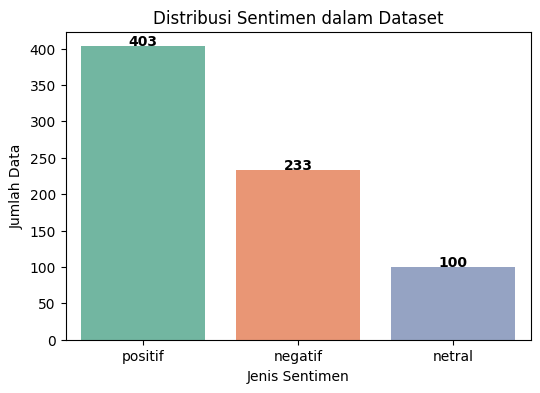

In [ ]:
plt.figure(figsize=(6,4))
sns.barplot(x=sentimen_counts.index, y=sentimen_counts.values, palette='Set2')
plt.title('Distribusi Sentimen dalam Dataset')
plt.xlabel('Jenis Sentimen')
plt.ylabel('Jumlah Data')
for i, v in enumerate(sentimen_counts.values):
    plt.text(i, v + 1, str(v), ha='center', fontweight='bold')
plt.show()

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('indonesian'))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.strip()
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

df['clean_text'] = df['text'].apply(clean_text)

df[['text', 'clean_text']].head()


,text,clean_text
0,bupati purwakarta periode bupati dedi jabat an...,bupati purwakarta periode bupati dedi jabat an...
1,arus deras transformasi digital tata kelola pe...,arus deras transformasi digital tata kelola pe...
2,mobil mewah lexus lx milik gubernur jawa barat...,mobil mewah lexus lx milik gubernur jawa barat...
3,siswa sekolah anggap nakal jawa barat kirim ma...,siswa sekolah anggap nakal jawa barat kirim ma...
4,wamen daya perempuan lindung anak veronica tan...,wamen daya perempuan lindung anak veronica tan...


In [ ]:
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['clean_text'])
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearSVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Akurasi: ", accuracy)
print("Presisi: ", precision)
print("Recall: ", recall)
print("F1-Score: ", f1)

cm = confusion_matrix(y_test, y_pred)

Akurasi:  0.8243243243243243
Presisi:  0.8370525931336743
Recall:  0.8243243243243243
F1-Score:  0.819921730910114


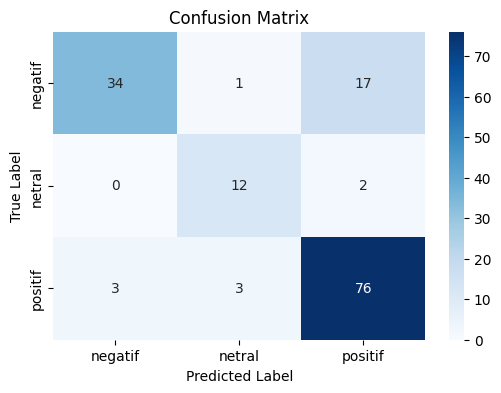

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

/tmp/ipython-input-15-2727518124.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=names, y=metrics, palette='Set2')


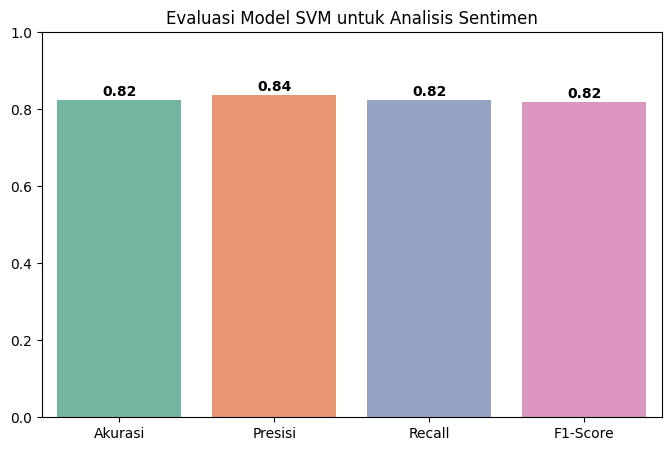

In [ ]:

metrics = [accuracy, precision, recall, f1]
names = ['Akurasi', 'Presisi', 'Recall', 'F1-Score']

plt.figure(figsize=(8, 5))
sns.barplot(x=names, y=metrics, palette='Set2')
plt.title('Evaluasi Model SVM untuk Analisis Sentimen')
plt.ylim(0, 1)
for i, v in enumerate(metrics):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', fontweight='bold')
plt.show()


In [ ]:
sentimen_counts = df['label'].value_counts()

print(sentimen_counts)

label
positif    403
negatif    233
netral     100
Name: count, dtype: int64
